In [142]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# PIL image
# numpy
# => torch

# 개행열채
# => 개채행열

## 구글 드라이브와 연동 (코랩 새로 켤 때마다 지워지기 때문에)

In [143]:
from google.colab import drive
drive.mount('/content/drive') # mount 를 여기에 해줘

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 구글 GPU 좀 써보자

In [144]:
DEVICE =  "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


## train_DS와 test_DS 구경

In [145]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

In [146]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [147]:
train_DS.class_to_idx # 10가지 클래스가 인덱싱 되어있다

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [148]:
train_DS.data.shape # 28 by 28 60000 장

torch.Size([60000, 28, 28])

In [149]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

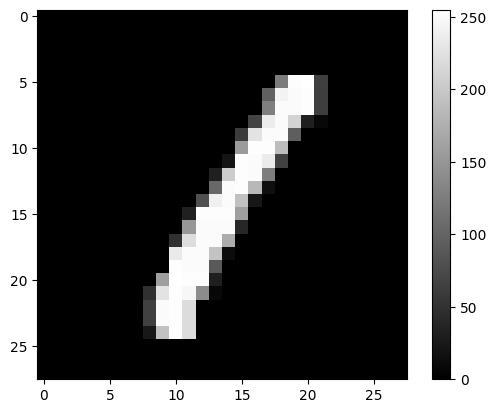

In [150]:
plt.imshow(train_DS.data[3], cmap="gray")
plt.colorbar()

In [151]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader 구경

In [152]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [153]:
(train_DL.dataset.data.shape)

torch.Size([60000, 28, 28])

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([1, 28, 28])
tensor(0)
torch.uint8
torch.float32


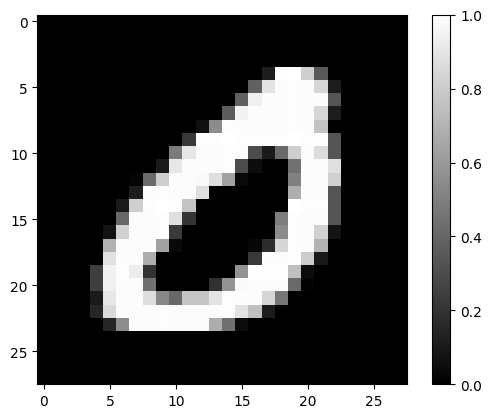

In [154]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자
print(type(train_DS.data))
print(type(x_batch))
print(x_batch.shape)
print(y_batch.shape)
print(x_batch[0].shape)
plt.imshow(x_batch[0].squeeze(), cmap='gray')
plt.colorbar()
print(y_batch[0])

print(train_DL.dataset.data.dtype)
print(x_batch.dtype) # 정수를 float 으로 바꿔준다

# ToTensor 의 역할
# 1. tensor로 바꿔준다
# 2. 개채행열도 바꿔준다
# 3. 0~1 사이로 바꿔준다 (int -> float)

## 본격적으로 model 만들기!

In [155]:
from torch import nn

class MLP(nn.Module) :
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(28*28,100), # 각 픽셀을 채널로 본다
                                    nn.ReLU(),
                                    nn.Linear(100,10)
                                    )
    def forward(self, x):
        x = self.linear(x)
        return x

In [156]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape)
flat_images = torch.flatten(x_batch, start_dim=1) # 1부터 펴라
print(flat_images.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


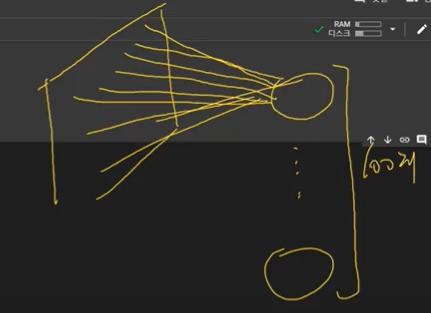

In [157]:
model = MLP()
print(model)
x_batch, _ = next(iter(train_DL))
print(model(torch.flatten(x_batch, start_dim=1)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## 모델 훈련시키기!

In [158]:
from torch import optim

LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()


def Train(model, train_DL, criterion, optimizer) :
    loss_history = []
    NoT = len(train_DL.dataset.data)
    model.train()

    for ep in range(EPOCH):
        rloss = 0 # running loss
        for x_batch, y_batch in train_DL :
            x_batch = x_batch.to(DEVICE) # gpu 사용 gpu 사용할 거면 cuda 위에 올린다
            y_batch = y_batch.to(DEVICE) # gpu 사용 gpu 사용할 거면 cuda 위에 올린다
            y_hat = model(torch.flatten(x_batch, start_dim = 1))

            loss = criterion(y_hat, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_b = loss.item() * x_batch.shape[0] # batch loss # BATCH_SIZE 를 곱하면 마지막 18개도 32개를 곱하니까..
            rloss += loss_b # running loss
        # print loss
        loss_e = rloss/NoT
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*20)

    return loss_history

## Cross Entropy 확인 (왜 모델에 softmax 를 안붙였을까?)

In [159]:
import torch.nn.functional as F

y_hat = torch.randn(3,5) # 데이터 3개, 5종류로 분류하는 문제 가
print(y_hat)# 가로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5,(3,)) # 0 부터 4까지 중복 순열로 3개 뽑아라
print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat, y_batch) # softmax 가 내장
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss() # softmax 가 내장
print(criterion(y_hat, y_batch))

# 방법 3
y_hat_soft = F.softmax(y_hat, dim=1)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft) : # 행씩 뜯어온다
    print(i,val)
    loss += -torch.log(val[y_batch[i]])
print(loss/3)

tensor([[-0.6968,  1.0574,  0.6384, -0.6799,  0.0112],
        [ 0.2410, -0.0948, -1.4804,  0.3259, -0.5152],
        [-1.4664, -0.0334, -0.0748,  0.2316,  0.7862]])
tensor([0, 2, 0])
tensor(2.9194)
tensor(2.9194)
tensor([[0.0734, 0.4241, 0.2789, 0.0746, 0.1490],
        [0.2897, 0.2071, 0.0518, 0.3154, 0.1360],
        [0.0413, 0.1733, 0.1663, 0.2259, 0.3933]])
0 tensor([0.0734, 0.4241, 0.2789, 0.0746, 0.1490])
1 tensor([0.2897, 0.2071, 0.0518, 0.3154, 0.1360])
2 tensor([0.0413, 0.1733, 0.1663, 0.2259, 0.3933])
tensor(2.9194)


## 모델 학습시키기

Epoch: 1, train loss: 0.308
--------------------
Epoch: 2, train loss: 0.144
--------------------
Epoch: 3, train loss: 0.099
--------------------
Epoch: 4, train loss: 0.076
--------------------
Epoch: 5, train loss: 0.061
--------------------


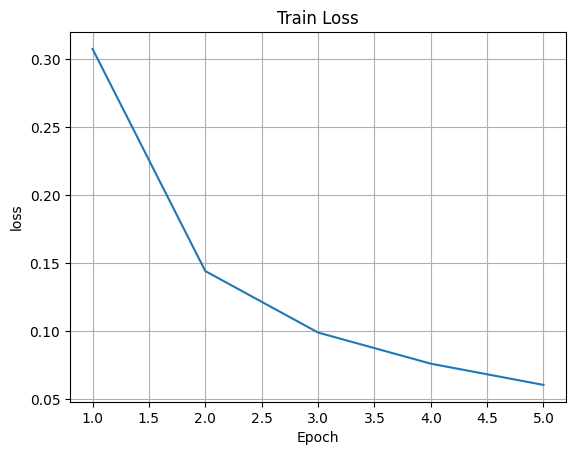

In [160]:
model = MLP().to(DEVICE) # x_batch, y_batch, model 까지 DEVICE 위에 올려줘야 함
optimizer = optim.Adam(model.parameters(), lr = LR)
loss_history = Train(model, train_DL, criterion, optimizer)

plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Train Loss")
plt.grid()

## 모델 저장하기 & 불러오기

In [161]:
save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/MLP_MNIST.pt"
torch.save(model.state_dict(), save_model_path)
model.state_dict()

OrderedDict([('linear.0.weight',
              tensor([[-0.0320,  0.0052,  0.0276,  ..., -0.0319,  0.0129, -0.0036],
                      [-0.0131,  0.0263, -0.0143,  ..., -0.0341, -0.0297, -0.0087],
                      [-0.0135,  0.0306,  0.0155,  ...,  0.0305, -0.0023, -0.0348],
                      ...,
                      [ 0.0212,  0.0174, -0.0154,  ..., -0.0111, -0.0031, -0.0313],
                      [-0.0292, -0.0029,  0.0088,  ..., -0.0054,  0.0016, -0.0058],
                      [-0.0355, -0.0034,  0.0083,  ...,  0.0124,  0.0005,  0.0049]],
                     device='cuda:0')),
             ('linear.0.bias',
              tensor([ 0.0040,  0.0194, -0.0459, -0.0664,  0.0134, -0.0297,  0.1032, -0.0604,
                      -0.0808, -0.0192,  0.0314,  0.2506,  0.0120, -0.0957,  0.0995, -0.0570,
                       0.2177, -0.0029,  0.0114,  0.1925,  0.1160,  0.0332,  0.0277,  0.0590,
                      -0.0016, -0.1794,  0.1042,  0.0713,  0.1382,  0.0347,  0.146

In [162]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))
# map_location 있어야 GPU 로 학습했던 거 현재 device 로 불러올 수 있음

<All keys matched successfully>

## 모델 테스트하기

In [199]:
def Test(model, test_DL) :
    model.eval()
    with torch.no_grad() :
        rcorrect=0
        for x_batch, y_batch in test_DL :
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(torch.flatten(x_batch, start_dim=1))
            # accuracy accumulation
            # print(y_hat.shape)
            pred = y_hat.argmax(dim = 1) # 10 개 중에 가장 큰 것을 골라야하기 때문에

            corrects_b = torch.sum(pred==y_batch).item()
            rcorrect += corrects_b
        accuracy_e = rcorrect/len(test_DL.dataset) * 100
    print(f"Test Accuracy: {accuracy_e} ({round(accuracy_e, 3)} %)")

In [201]:
Test(load_model, test_DL)

Test Accuracy: 97.42 (97.42 %)


In [249]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(torch.flatten(x_batch, start_dim = 1))
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(10,8))
    for idx in range(8):
        plt.subplot(2,4, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

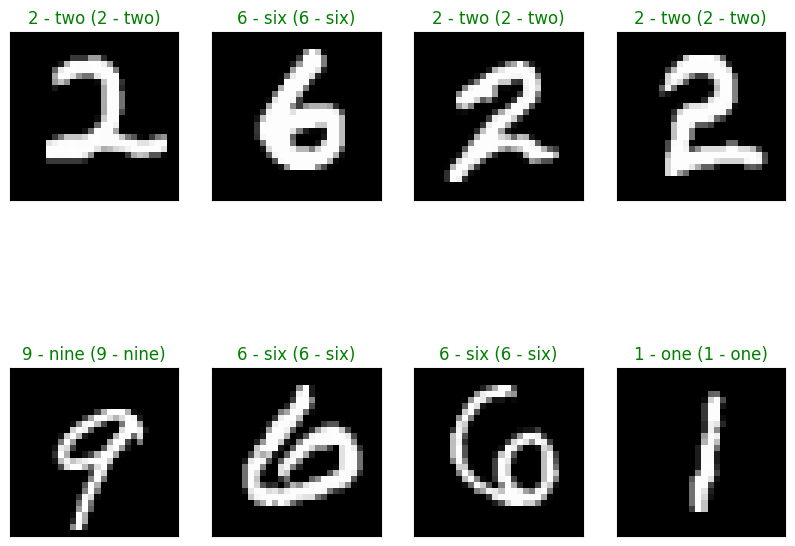

In [251]:
Test_plot(load_model, test_DL)

In [253]:
def count_params(model) :
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [254]:
count_params(model)

79510